<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/Titanic11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Support libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder , StandardScaler

# Machine Learning Model Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Warning error ignore
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#Explore Data

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.head()
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
train.shape

(891, 12)

In [ ]:

train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

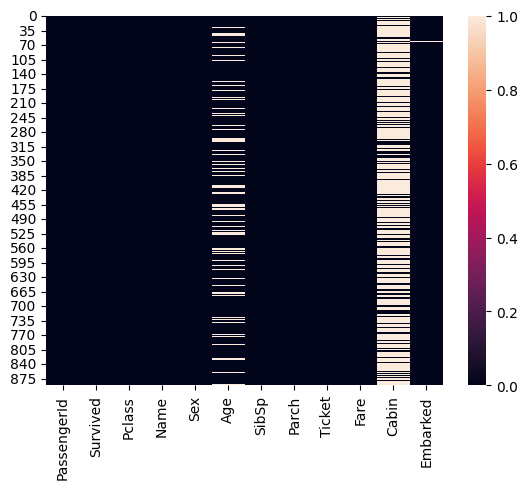

In [ ]:
sns.heatmap(train.isnull())

In [ ]:
train.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


#Cleaning Data

In [ ]:
train.drop(['Cabin', 'Ticket', 'Name', 'Embarked'], axis=1, inplace=True, errors='ignore')
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [ ]:
train.Age = train.Age.fillna(train.Age.median())
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,28.0,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


# Transform Data

In [ ]:
la = LabelEncoder()
obj = train.select_dtypes(include='object')
non_obj = train.select_dtypes(exclude='object')


In [ ]:
for i in range(0, obj.shape[1]):
    obj.iloc[:, i] = la.fit_transform(obj.iloc[:, i])

In [ ]:
obj

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
obj = obj.astype('int')
data = pd.concat([obj,non_obj] , axis = 1)
data

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,1,0,3,22.0,1,0,7.2500
1,0,2,1,1,38.0,1,0,71.2833
2,0,3,1,3,26.0,0,0,7.9250
3,0,4,1,1,35.0,1,0,53.1000
4,1,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,1,887,0,2,27.0,0,0,13.0000
887,0,888,1,1,19.0,0,0,30.0000
888,0,889,0,3,28.0,1,2,23.4500
889,1,890,1,1,26.0,0,0,30.0000


<Axes: >

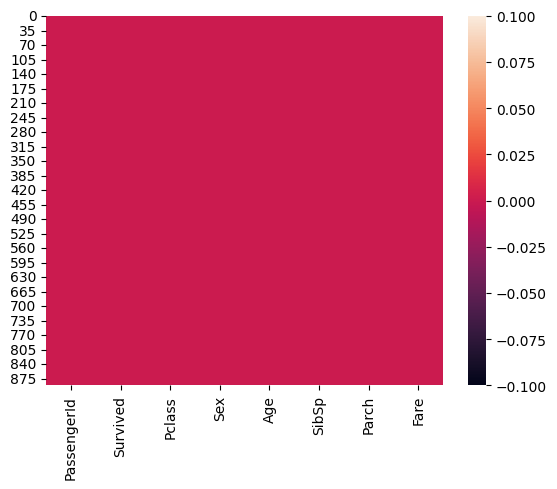

In [ ]:
sns.heatmap(train.isnull())

In [ ]:
train[obj.columns] = obj.apply(lambda col: la.fit_transform(col))


In [ ]:
sc = StandardScaler()

In [ ]:
scal1=data[['Age']]
scal2=data[['Fare']]
data[['Age']] = sc.fit_transform(scal1)
data[['Fare']] = sc.fit_transform(scal2)


In [ ]:
data

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,1,0,3,-0.565736,1,0,-0.502445
1,0,2,1,1,0.663861,1,0,0.786845
2,0,3,1,3,-0.258337,0,0,-0.488854
3,0,4,1,1,0.433312,1,0,0.420730
4,1,5,0,3,0.433312,0,0,-0.486337
...,...,...,...,...,...,...,...,...
886,1,887,0,2,-0.181487,0,0,-0.386671
887,0,888,1,1,-0.796286,0,0,-0.044381
888,0,889,0,3,-0.104637,1,2,-0.176263
889,1,890,1,1,-0.258337,0,0,-0.044381


<Axes: >

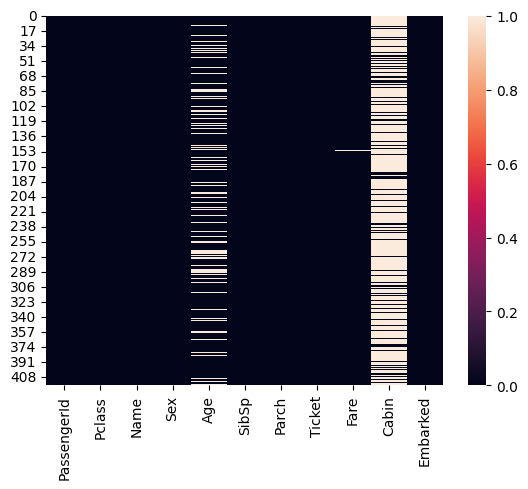

In [ ]:
sns.heatmap(test.isnull())

# Analysing the Data

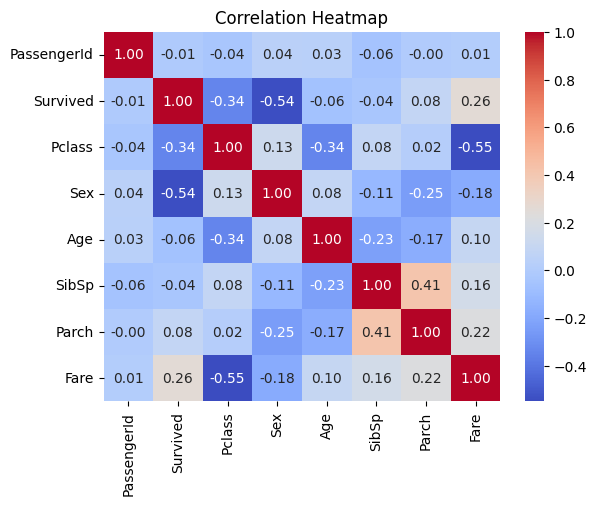

In [ ]:
co = train.corr()

sns.heatmap(co, annot=True, cmap='coolwarm', fmt=".2f" )
plt.title('Correlation Heatmap')
plt.show()

<Axes: ylabel='count'>

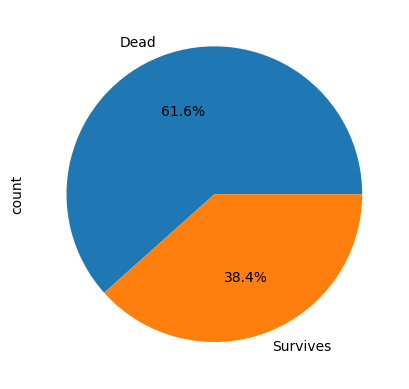

In [ ]:
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%' , labels=['Dead' , 'Survives'])

<Axes: xlabel='Sex', ylabel='count'>

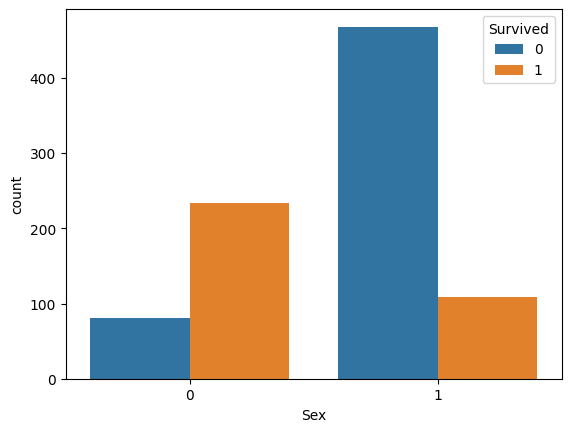

In [ ]:
sns.countplot(x= train.Sex , hue= train.Survived)

<Axes: xlabel='Pclass', ylabel='count'>

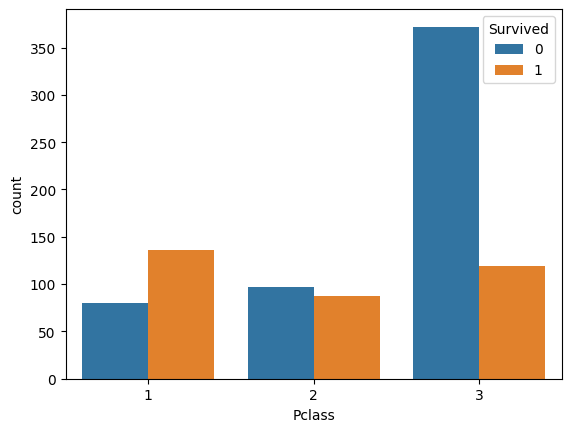

In [ ]:
sns.countplot(x= train.Pclass , hue= train.Survived)

<Axes: xlabel='Age', ylabel='Count'>

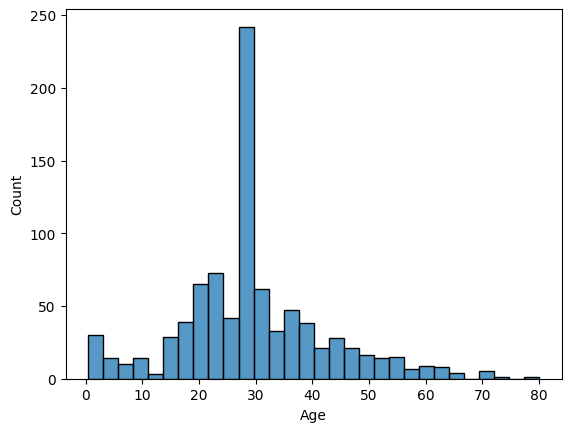

In [ ]:
sns.histplot(train.Age)

# things to do before (changes in test data )

In [ ]:
x_test_final = test.drop(['PassengerId', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1)
for col in x_test_final.select_dtypes(include='object').columns:
    x_test_final[col] = LabelEncoder().fit_transform(x_test_final[col])
scaler = StandardScaler()
x_test_final[['Age', 'Fare']] = scaler.fit_transform(x_test_final[['Age', 'Fare']])

# Create Model

In [ ]:
x= train.drop(['Survived'] , axis=1)
y=train.Survived
x_train,x_test,y_train,y_test =  train_test_split(x,y , train_size=.8)

In [ ]:
modelx = RandomForestClassifier()
modelx.fit(x_train, y_train)



RandomForestClassifier()

In [ ]:
accuracies=[]

In [ ]:

models = [
    LogisticRegression(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    SVC()
]
for model in models:
    all(model)


accuracies is :  0.776536312849162
accuracies is :  0.8212290502793296
accuracies is :  0.8212290502793296
accuracies is :  0.7653631284916201
accuracies is :  0.6815642458100558


In [ ]:
def all(model):
  model.fit(x_train,y_train)
  pre=model.predict(x_test)
  accuracy = accuracy_score(pre, y_test)
  print("accuracies is : " , accuracy)
  accuracies.append(accuracy)



In [ ]:
model2 = LogisticRegression()


In [ ]:
new= pd.DataFrame({'algorithms : ':models , 'accuracies : ': accuracies})
new

,algorithms :,accuracies :
0,LogisticRegression(),0.776536
1,([DecisionTreeRegressor(criterion='friedman_ms...,0.821229
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.821229
3,GaussianNB(),0.765363
4,SVC(),0.681564


In [ ]:
pre =model1.predict(x_test)
accuracy_score(pre,y_test)

0.9441340782122905

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
x_train = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

for col in x_train.select_dtypes(include='object').columns:
    x_train[col] = LabelEncoder().fit_transform(x_train[col])

scaler = StandardScaler()
x_train[['Age', 'Fare']] = scaler.fit_transform(x_train[['Age', 'Fare']])

y_train = train['Survived']


In [ ]:
modelx = RandomForestClassifier()
modelx.fit(x_train, y_train)

pre1 = modelx.predict(x_test_final)

new_Dataframe = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pre1})
print(new_Dataframe)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
